# INF5860 Weekly exercies 3

## Load datasets and visualize data
In this exercise most of the work is already done. This will be a demonstration in loading data and visualzing for later projects. By changeing the classification algorithms and seeing the results I hope you will build some intuition on how the different algorithms work.

In [1]:
#Some setup

import time
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

## Generalizing with K-Nearest Neighbors

In this exercise we will look at diffrences in generalization in a *KNN* classifier.

In the functions **evaluate_knn** and **evaluate_knn_crossval**, in **classification.py**, you are supposed to do KNN classification, with k equal to the incomming k. The dataset is already generated at the top of the function.

In **evalute_knn** you should evaluate the accuracy, when you are both *training* and *testing* on the same dataset.

In **evaluate_knn_crossval** you should use cross-validation to estimate the *out-of-sample* accuracy.

You can use all the functionality of numpy and scikit-learn (sklearn) in this exercise.

The cell below will then plot the accuracies for different sample sizes.

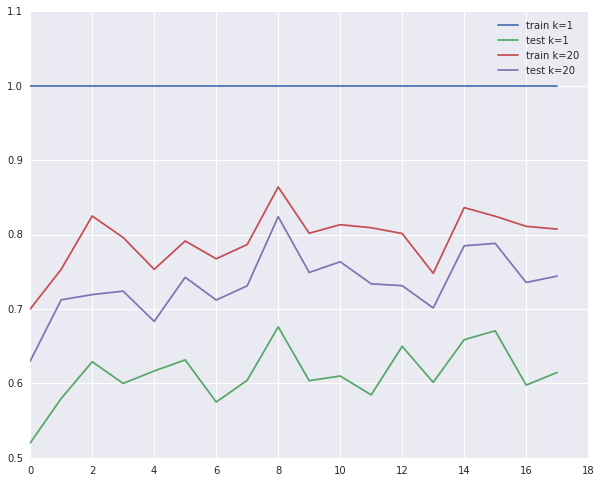

In [182]:
from sklearn.neighbors import  KNeighborsClassifier
from sklearn import datasets
from classification import evaluate_knn, evaluate_knn_crossval
import matplotlib.pyplot as plt

clf = KNeighborsClassifier(1)
clf2 = KNeighborsClassifier(30)
n_samples = 100

for k in [1, 20]:
    scores1 = []; scores2=[]
    for n_samples in range(100, 1000, 50):

        score1 = evaluate_knn(k, n_samples)
        score2 = evaluate_knn_crossval(k, n_samples)
        scores1.append(score1); scores2.append(score2)

    plt.plot(scores1, label='train k=%d'%k)
    plt.plot(scores2, label='test k=%d'%k)
plt.legend()


In the next cell you can test with a smaller number of features.

Can you think of a reason why *test k=1* and *test k=20* are much closer in this test?

** \_\_\_\_\_\_\_\_\_\_ **

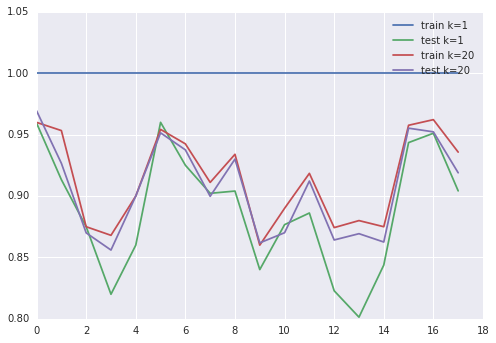

In [144]:
from sklearn.neighbors import  KNeighborsClassifier
from sklearn import datasets
from classification import evaluate_knn, evaluate_knn_crossval
import matplotlib.pyplot as plt

clf = KNeighborsClassifier(1)
clf2 = KNeighborsClassifier(30)
n_samples = 100

for k in [1, 20]:
    scores1 = []; scores2=[]
    for n_samples in range(100, 1000, 50):

        score1 = evaluate_knn(k, n_samples, n_features=4, n_informative=2)
        score2 = evaluate_knn_crossval(k, n_samples, n_features=4, n_informative=2)
        scores1.append(score1); scores2.append(score2)

    plt.plot(scores1, label='train k=%d'%k)
    plt.plot(scores2, label='test k=%d'%k)
plt.legend()


## San Fransisco Crime Investigation

Her is some data on location for different crimes in San Fransisco.
Run the first cell to load the data. You can input different categories that you want to investigate.

Running the second cell will output the decision boundary of a given classifier. Try out different **classifiers**, **parameters** and **categories** and see if you get the expected desicion boundaries.

*Why do you think the classifiers with very compex decision boundaries, such as **nearest neighbor** and **gaussian processes** get so good results?* (There are *at least* 2 possible explanations)

Categories: ['ARSON' 'ASSAULT' 'BAD CHECKS' 'BRIBERY' 'BURGLARY' 'DISORDERLY CONDUCT'
 'DRIVING UNDER THE INFLUENCE' 'DRUG/NARCOTIC' 'DRUNKENNESS' 'EMBEZZLEMENT'
 'EXTORTION' 'FAMILY OFFENSES' 'FORGERY/COUNTERFEITING' 'FRAUD' 'GAMBLING'
 'KIDNAPPING' 'LARCENY/THEFT' 'LIQUOR LAWS' 'LOITERING' 'MISSING PERSON'
 'NON-CRIMINAL' 'OTHER OFFENSES' 'PORNOGRAPHY/OBSCENE MAT' 'PROSTITUTION'
 'RECOVERED VEHICLE' 'ROBBERY' 'RUNAWAY' 'SECONDARY CODES'
 'SEX OFFENSES FORCIBLE' 'SEX OFFENSES NON FORCIBLE' 'STOLEN PROPERTY'
 'SUICIDE' 'SUSPICIOUS OCC' 'TREA' 'TRESPASS' 'VANDALISM' 'VEHICLE THEFT'
 'WARRANTS' 'WEAPON LAWS']


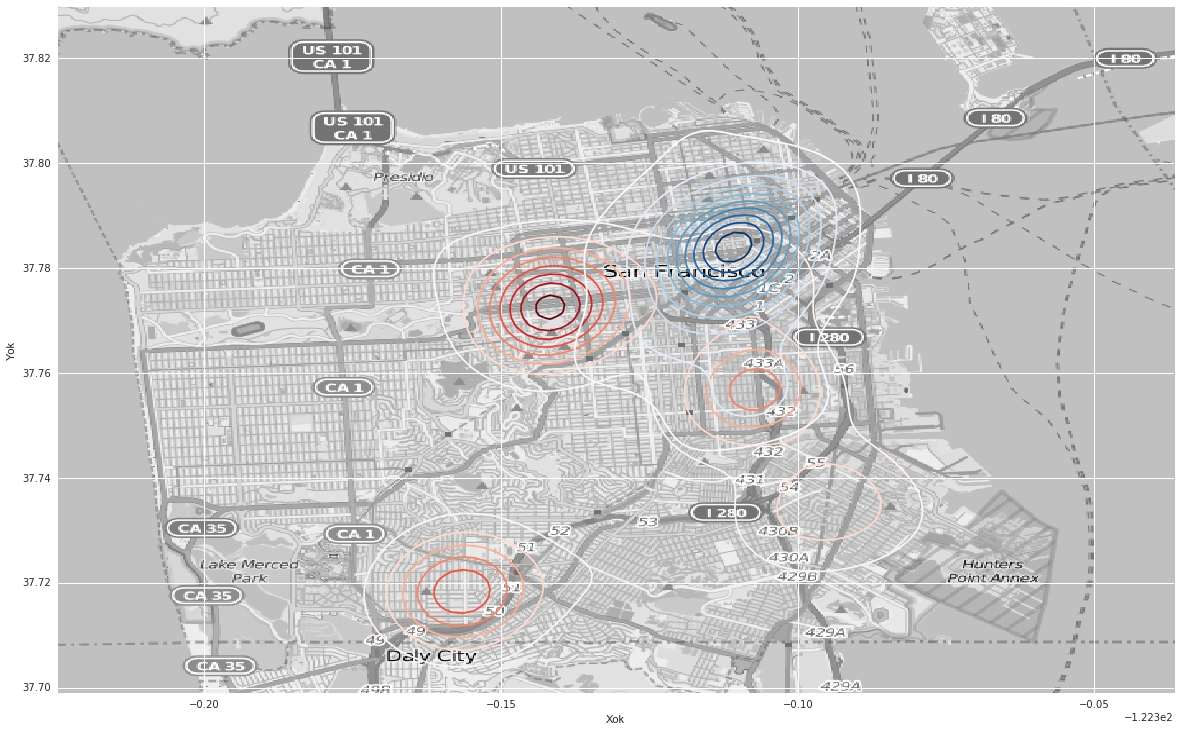

In [4]:
import SFCrime as sfc
data = sfc.get_data(categories=['RUNAWAY', 'TRESPASS'])
ax = sfc.plot_map(data)

Accuracy 0.822888283379


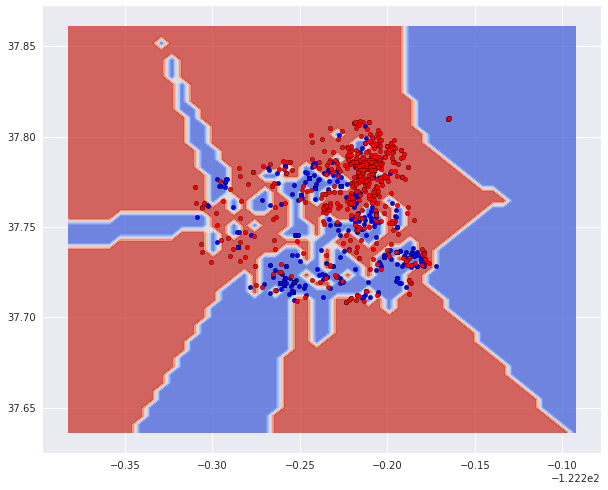

In [68]:
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from classification import plot_classification
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


#GaussianNB()
#GaussianProcessClassifier(1.0 * RBF(0.5), warm_start=True)
#clf = SVC(C=1, gamma=2, probability=True)
clf = KNeighborsClassifier(1)

x_train, x_test, y_train, y_test = sfc.data_to_train_test(data)


clf.fit(x_train, y_train)
plot_classification(x_train, y_train, clf)

y_ = clf.predict(x_test)
print 'Accuracy', (y_ == y_test).mean()

## Cifar

Now we will finally load some images.

In the second cell - try different classifiers and find the ones that work best.

Why do the classifiers in available in sklearn work so badly?
In the previous exercies the models with complex decision boundary did best. Why do the do the worst in this exercise?


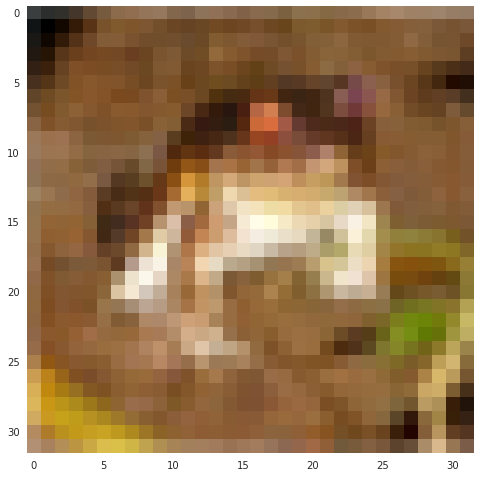

In [59]:
from cifar import load_cifar_file

images, labels = load_cifar_file('./input/data_batch_1')
plt.imshow(images[0]); plt.grid(b=False) #show first image

In [65]:
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

clf = KNeighborsClassifier(1)
sample_size = 200
X = images[:sample_size].reshape((sample_size, -1)) #flatten images
y = labels[:sample_size]
X_test = images[sample_size:2*sample_size].reshape((sample_size, -1))
y_test = labels[sample_size: 2*sample_size]

clf.fit(X, y)
print 'Train:', clf.score(X, y)
print 'Test:', clf.score(X_test, y_test)

Train: 1.0
Test: 0.18


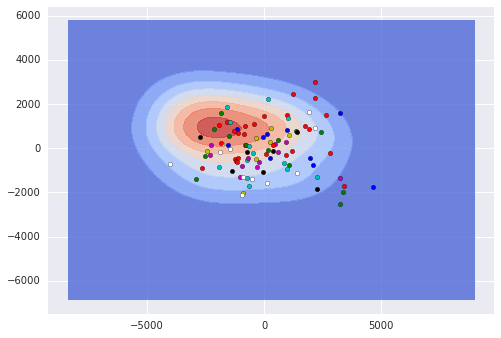

In [19]:
from sklearn.decomposition import PCA
from classification import plot_classification

clf = GaussianNB()
pca = PCA(n_components=2)
Xt = pca.fit_transform(X)
Xt_test = pca.transform(X_test)

clf.fit(Xt[:, :2], y)
plot_classification(Xt[:, :2], y, clf)


## Nearest Neighbor

Use the NearestNeighbors class from sklearn to plot the 4 nearest neighbors (not the same image) to the images displayed by running the cell below.

Use this to reason about why the machine learning techinques is failing and propose possible solutions to alliviate some of the problems.

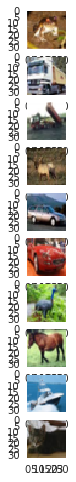

In [56]:
from sklearn.neighbors import NearestNeighbors

for i, (img, l) in enumerate(zip(images[:10], labels[:10])):
    plt.subplot(10, 5, 5*i+1)
    plt.imshow(img)
    plt.grid(b=False)


## Implement a Nearest Neighbor classifier

In **classification.py** there is a shell of a class called **NearestNeighborClassification**. Fill out the **predict** method to return the correct y array.

To get reasonable perfomance, it is a good idea to use vectorization as much as possible (built in numpy operators working on arrays). Do to memory constraints, you may have to restrict the number of incomming x-values you solve for at once. That's why I have included a **batch_size** parameter.

An alternative approach to get good performance is to use the **numba** library and the **@jit** annotation.

Test the method with the second cell below.
A correct implementation should give around *0.78 - 0.82* in accuracy.

Categories: ['ARSON' 'ASSAULT' 'BAD CHECKS' 'BRIBERY' 'BURGLARY' 'DISORDERLY CONDUCT'
 'DRIVING UNDER THE INFLUENCE' 'DRUG/NARCOTIC' 'DRUNKENNESS' 'EMBEZZLEMENT'
 'EXTORTION' 'FAMILY OFFENSES' 'FORGERY/COUNTERFEITING' 'FRAUD' 'GAMBLING'
 'KIDNAPPING' 'LARCENY/THEFT' 'LIQUOR LAWS' 'LOITERING' 'MISSING PERSON'
 'NON-CRIMINAL' 'OTHER OFFENSES' 'PORNOGRAPHY/OBSCENE MAT' 'PROSTITUTION'
 'RECOVERED VEHICLE' 'ROBBERY' 'RUNAWAY' 'SECONDARY CODES'
 'SEX OFFENSES FORCIBLE' 'SEX OFFENSES NON FORCIBLE' 'STOLEN PROPERTY'
 'SUICIDE' 'SUSPICIOUS OCC' 'TREA' 'TRESPASS' 'VANDALISM' 'VEHICLE THEFT'
 'WARRANTS' 'WEAPON LAWS']


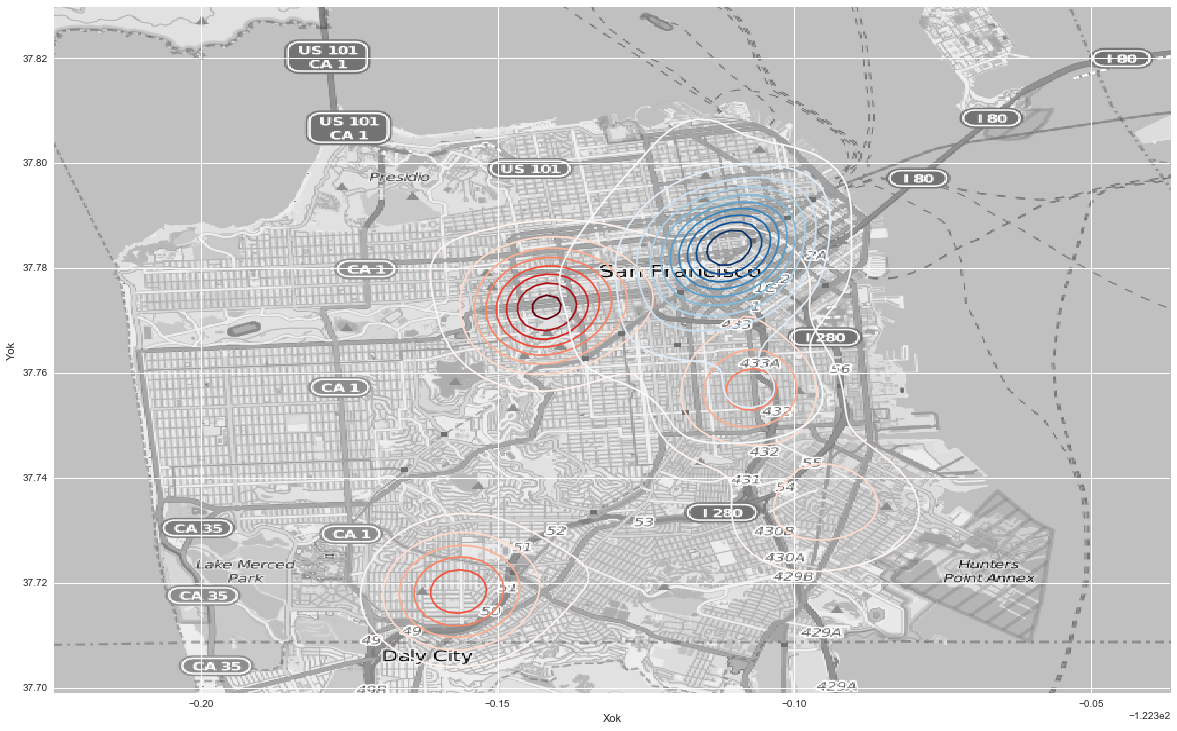

In [2]:
import SFCrime as sfc
data = sfc.get_data(categories=['RUNAWAY', 'TRESPASS'])
ax = sfc.plot_map(data)

In [4]:
from classification import NearestNeighborClassification

clf = NearestNeighborClassification()

x_train, x_test, y_train, y_test = sfc.data_to_train_test(data)
clf.fit(x_train, y_train)

y_ = clf.predict(x_test)
print 'Accuracy', (y_ == y_test).mean()

Accuracy 0.827170105099
